jax배열 만들기

In [ ]:
import jax.numpy as jnp
import matplotlib.pyplot as plt
import jax.random as jr

In [ ]:
#넘파이 배열 선언하기
#배열은 넘파이와 똑같다
a=jnp.array([[1,2,3],[4,5,6]])
print(a)

[[1 2 3]
 [4 5 6]]


스칼라배

In [ ]:
print(a*10)

[[10 20 30]
 [40 50 60]]


In [ ]:
b=jnp.array([3,6,9])

In [ ]:
#브로드 캐스트
print(a*b)

[[ 3 12 27]
 [12 30 54]]


원소 접근

In [ ]:
print(a[0])
print(a[1][2])

[1 2 3]
6


In [ ]:
for row in a:
  print(row)

[1 2 3]
[4 5 6]


In [ ]:
#평탄화
c=a.flatten()
print(c)

[1 2 3 4 5 6]


퍼셉트론 구현

In [ ]:
def AND(x1,x2) -> float:
  w1,w2,theta = 1.0,1.0,1.5
  tmp=x1*w1+x2*w2
  if tmp<=theta:
    return 0
  else:
    return 1

In [ ]:
AND(1,0)

0

In [ ]:
def AND2(x1,x2) -> float:
  x=jnp.array([x1,x2])
  w=jnp.array([1,1])
  b=-0.7
  tmp=jnp.sum(x*w)+b
  if tmp<=0:
    return 0
  else:
    return 1

In [ ]:
AND2(1,1)

1

신경망 구현

In [ ]:
#활성화 함수 구현 계단함수
def setp_func(x) ->int:
  if x>1:
    return 1
  else:
    return 0

In [ ]:
#계단함수 넘파이형 수정
def setp_func(x):
  y=x>0
  return y.astype(jnp.int)

In [ ]:
def sigmoid(x):
  return 1/(1+jnp.exp(-x))

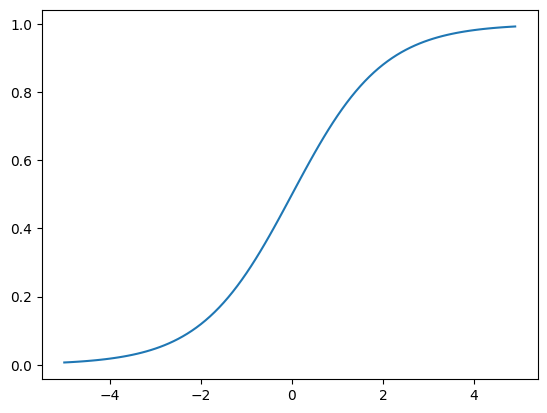

In [ ]:
x=jnp.arange(-5,5,0.1)
y=sigmoid(x)
plt.plot(x,y)
plt.show()

In [ ]:
def relu(x):
  return jnp.maximum(0,x)

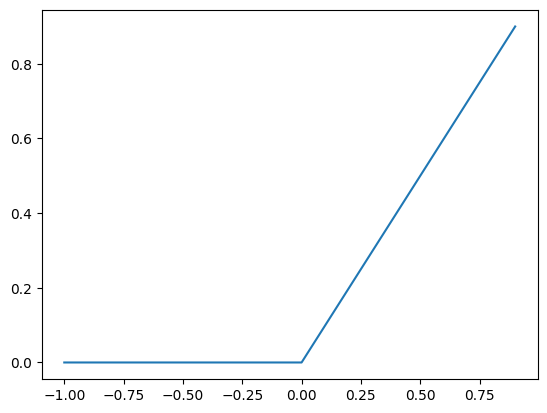

In [ ]:
x=jnp.arange(-1,1,0.1)
y=relu(x)
plt.plot(x,y)
plt.show()

다차원 배열의 계산
3*2 배열 이랑 2*3 배열


In [ ]:
a=jnp.array([[1,2],[3,4],[5,6]])
b=jnp.array([[1,2,3],[4,5,6]])
print(a.shape)
print(b.shape)
print(a)
print(b)
print(jnp.dot(a,b))
#로직 a의 세로 곱 b의 가로 의합은 a의 세로줄,b의 가로줄

(3, 2)
(2, 3)
[[1 2]
 [3 4]
 [5 6]]
[[1 2 3]
 [4 5 6]]
[[ 9 12 15]
 [19 26 33]
 [29 40 51]]


신경망에서의 순전파 연산은
각 뉴런노드의 입력값 a개의 1차원행렬
a개의 노드가 다음의 b개의 노드사이의 가진 가중치
 a*b개의 2차원 행렬의 곱으로 연산가능하다
 (1,a) dot (a,b)=b

In [ ]:
x=jnp.array([1,2])
w=jnp.array([[1,2,3],[4,5,6]])
y=jnp.dot(x,w)
print(y)

[ 9 12 15]


In [ ]:
#바이어스가 추가된 경우 b개의 바이어스가중치를 더해서 연산
x=jnp.array([1,2])
w=jnp.array([[1,2,3],[4,5,6]])
b=jnp.array([1,2,3])
y=jnp.dot(x,w)+b
print(y)

[10 14 18]


다층 신경망 연산

In [ ]:
class Linear:
    def __init__(self, key, input_dim, output_dim, bias=True):
        self.w = jr.normal(key, (input_dim, output_dim))
        self.bias_enable = bias
        if bias:
            self.b = jnp.zeros(output_dim) # 보통 bias는 0으로 초기화합니다 (ones도 가능은 함)

    def forward(self, x):
        # 3. self.w로 수정
        out = jnp.dot(x, self.w)
        if self.bias_enable:
            out += self.b
        return out

In [ ]:
ll=Linear(jnp.array([394,1],dtype="uint32"),2,3,False)
a=jnp.array([1,-2])
print(ll.forward(a))

[-2.754105  -2.1354122  0.9900913]


활성화 함수를 연결해보자

In [ ]:
#1*a 인풋 아웃풋도 똑같다
class RELU:
  def relu(x):
    return jnp.maximum(0,x)
  def forward(self,x):
    return relu(x)


In [ ]:
print(relu(ll.forward(a)))

[0.        0.        0.9900913]


In [ ]:
class SimpleMLP:
    def __init__(self, key, input_dim, hidden_dims, output_dim, bias=True):
        self.layers = []
        prev_dim = input_dim

        # 4. 각 층마다 다른 난수 키를 사용하기 위해 key를 쪼갭니다 (Split)
        layer_keys = jr.split(key, len(hidden_dims) + 1)

        for i, hidden_dim in enumerate(hidden_dims):
            # i번째 키를 사용하여 Linear 층 생성
            self.layers.append(Linear(layer_keys[i], prev_dim, hidden_dim, bias))
            self.layers.append(RELU())
            prev_dim = hidden_dim

        # 마지막 출력층 (마지막 키 사용)
        self.layers.append(Linear(layer_keys[-1], prev_dim, output_dim, bias))

    def forward(self, x):
        for layer in self.layers:
            x = layer.forward(x)
        return x

In [ ]:
# 메인 키 생성
seed = jr.PRNGKey(42)
print(seed)
# MLP 초기화 시 seed를 전달
mlp = SimpleMLP(key=seed, input_dim=3, hidden_dims=[3, 3], output_dim=2)

[ 0 42]


In [ ]:
a = jnp.array([2,1,2]) # Changed 'a' to have 3 elements to match the input_dim of mlp
print(mlp.forward(a))

[-1.1861392   0.10406769]


In [ ]:
def softmax(x):
  exp_x=jnp.exp(x)
  sum_exp_x=jnp.sum(exp_x)
  return exp_x/sum_exp_x

오버 플로 방지한  softmax

In [ ]:
def softmax(x):
  max_x=jnp.max(x)
  exp_x=jnp.exp(x-max_x)
  sum_exp_x=jnp.sum(exp_x)
  return exp_x/sum_exp_x